## Multilayer Perceptron

Berikut adalah kode Multilayer Perceptron.  
Tugas Praktikan adalah melengkapi kode tersebut.
- Buat fungsi aktivasi step (binary) bernama percep_step().
- Buatlah fungsi aktivasi sigmoid bernama sigmoid().
- Lengkapi model Multilayer Perceptron bernama mlp_fit().
- Lengkapi prediksi bernama mlp_predict().
- Ubah format input menjadi matriks 2D menggunakan numpy.

In [43]:
import numpy as np

# Fungsi aktivasi step (binary)
def percep_step(input, th=0):
    return 1 if input > th else 0

# Fungsi aktivasi sigmoid
def sigmoid(x, derivative=False):
    if derivative:
        return x * (1 - x)
    return 1 / (1 + np.exp(-x))

def mlp_fit(X, target, hidden_size, learning_rate=0.1, max_epoch=-1, verbose=False):
    input_size = len(X[0])
    output_size = len(target[0])

    # Inisialisasi bobot untuk lapisan input ke lapisan tersembunyi
    w_input_hidden = 2 * np.random.random((input_size, hidden_size)) - 1
    # Inisialisasi bobot untuk lapisan tersembunyi ke lapisan output
    w_hidden_output = 2 * np.random.random((hidden_size, output_size)) - 1

    epoch = 0

    while max_epoch == -1 or epoch < max_epoch:
        epoch += 1

        if verbose:
            print('\nEpoch', epoch)

        for i, x in enumerate(X):
            # Lakukan feedforward input ke lapisan tersembunyi menggunakan aktivasi sigmoid
            hidden_input = np.dot(x, w_input_hidden)
            hidden_output = sigmoid(hidden_input)

            # Lakukan feedforward lapisan tersembunyi ke lapisan output menggunakan aktivasi percep_step
            output_input = np.dot(hidden_output, w_hidden_output)
            output = percep_step(output_input)

            #Jangan mengubah kode di bawah ini.
            error = target[i] - output
            delta_output = error * sigmoid(output_input, derivative=True)
            error_hidden = delta_output.dot(w_hidden_output.T)
            delta_hidden = error_hidden * sigmoid(hidden_input, derivative=True)

            w_hidden_output += hidden_output.reshape(-1, 1) @ delta_output.reshape(1, -1) * learning_rate
            w_input_hidden += x.reshape(-1, 1) @ delta_hidden.reshape(1, -1) * learning_rate

        if verbose:
            print('Bobot Input-Hidden:', w_input_hidden)
            print('Bobot Hidden-Output:', w_hidden_output)

    return w_input_hidden, w_hidden_output, epoch

def mlp_predict(X, w_input_hidden, w_hidden_output, th=0):
    Y = []
    for x in X:
        # Lakukan feedforward input ke lapisan tersembunyi menggunakan aktivasi sigmoid.
        hidden_input = np.dot(x, w_input_hidden)
        hidden_output = sigmoid(hidden_input)
        # Lakukan feedforward lapisan tersembunyi ke lapisan output menggunakan aktivasi percep_step, jangan lupa menggunakan threshold.
        output_input = np.dot(hidden_output, w_hidden_output)
        y = percep_step(output_input, th)

        Y.append(y)

    return Y

def calc_accuracy(y_true, y_pred):
    s = [1 if y_true[i] == y_pred[i] else 0 for i in range(len(y_true))]
    accuracy = sum(s) / len(y_true)
    return accuracy

In [44]:
import matplotlib.pyplot as plt

#Jangan mengubah kode di bawah ini.
def plot_decision_boundary(X, target, w_input_hidden, w_hidden_output):
    h = .02  # Langkah grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    grid_input = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array(mlp_predict(grid_input, w_input_hidden, w_hidden_output))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=target, cmap=plt.cm.Spectral)
    plt.show()


Epoch 1
Bobot Input-Hidden: [[ 0.02133972  0.47008219 -0.3101557  -0.29715867 -0.16874511]
 [-0.62312622 -0.49240052  0.43889657  0.51944292  0.04597092]]
Bobot Hidden-Output: [[-0.74208346]
 [ 0.45980287]
 [ 0.38317657]
 [ 0.05575074]
 [-0.53494781]]

Epoch 2
Bobot Input-Hidden: [[ 0.01539683  0.47561687 -0.31761536 -0.29819234 -0.16504557]
 [-0.61420444 -0.49828185  0.44835181  0.52110122  0.04410262]]
Bobot Hidden-Output: [[-0.71768525]
 [ 0.48170877]
 [ 0.40026282]
 [ 0.0721549 ]
 [-0.51523825]]

Epoch 3
Bobot Input-Hidden: [[ 0.01342417  0.47884405 -0.32342591 -0.29918701 -0.16234775]
 [-0.60717131 -0.50184946  0.45604986  0.52276681  0.04308802]]
Bobot Hidden-Output: [[-0.6984527 ]
 [ 0.49930854]
 [ 0.41374378]
 [ 0.08516004]
 [-0.49963202]]

Epoch 4
Bobot Input-Hidden: [[ 0.01305442  0.48028244 -0.32800054 -0.30006202 -0.16039664]
 [-0.60239191 -0.50358861  0.46228226  0.52428541  0.04250967]]
Bobot Hidden-Output: [[-0.68340314]
 [ 0.51312009]
 [ 0.42386496]
 [ 0.09491054]
 [-0

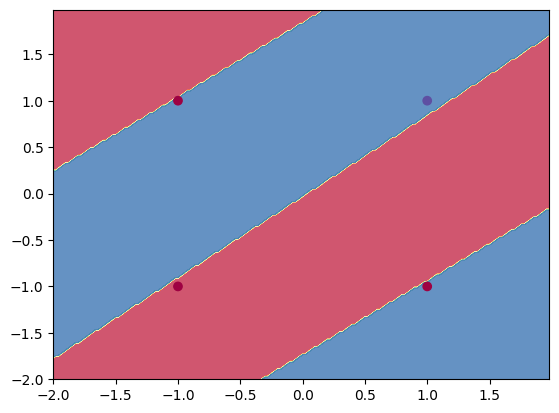

In [45]:
#Ubahlah  format input menjadi matriks 2D
#train = (1, 1), (1, -1), (-1, 1), (-1, -1)
#target = 1, -1, -1, -1
train = np.array([[1, 1], [1, -1], [-1, 1], [-1, -1]])
target = np.array([[1], [-1], [-1], [-1]])

w_input_hidden, w_hidden_output, epoch = mlp_fit(train, target, hidden_size=5, learning_rate=0.05, max_epoch=1000, verbose=True)
print('Bobot Input-Hidden:', w_input_hidden)
print('Bobot Hidden-Output:', w_hidden_output)
print('Epochs:', epoch)


output = np.array(mlp_predict(train, w_input_hidden, w_hidden_output))

accuracy = calc_accuracy(target, output)
print('Epochs:', epoch)
print('Output:', output)
print('Target:', target)
print('Accuracy:', accuracy)

# Menampilkan plot dari decision boundary
plot_decision_boundary(train, target, w_input_hidden, w_hidden_output)


 kode MLP  tidak mencapai akurasi 1 karena beberapa masalah utama. Pertama, fungsi aktivasi output menggunakan percep_step, tetapi backpropagation memakai sigmoid, yang tidak konsisten sehingga pembaruan bobot menjadi salah. Kedua, target data adalah 1 dan -1, sementara sigmoid mengeluarkan nilai dalam rentang [0, 1], menyebabkan ketidaksesuaian saat pelatihan.